# Labelling experiment results

## Data preperation

In [2]:
import os
import pandas as pd
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import numpy as np




data_folder = 'data/article_ratings/'
pd.set_option('display.max_rows', 5)

df_total = pd.DataFrame()
for file in os.listdir(data_folder):
    df = pd.read_csv(data_folder + file)
    df["name"] = file.split("_")[0]
    print(f"Number of reviewed articles by {file.split('_')[0]}:    {df.shape[0]}")
    df_total = df_total.append(df)
    


df_art = pd.read_csv("data/articles_topics.csv", index_col = 0)



df_total.rename(columns={"sentiment": "manual_sentiment"}, inplace=True)


df_art = df_art.merge(df_total[["paragraphs", "manual_sentiment", "outcome"]], on="paragraphs", how="left")

df_art["manual_sentiment"] = df_art.manual_sentiment.map({1: "POSITIVE", -1: "NEGATIVE", 0: "NEUTRAL", np.nan: np.nan})

Number of reviewed articles by Ahmed:    28
Number of reviewed articles by Ale:    28
Number of reviewed articles by Artemis:    28
Number of reviewed articles by Bart:    28
Number of reviewed articles by David:    28
Number of reviewed articles by Sophie:    28


C:\Users\barta\AppData\Local\Temp\ipykernel_9644\2457337643.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
C:\Users\barta\AppData\Local\Temp\ipykernel_9644\2457337643.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
C:\Users\barta\AppData\Local\Temp\ipykernel_9644\2457337643.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
C:\Users\barta\AppData\Local\Temp\ipykernel_9644\2457337643.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
C:\Users\barta\AppData\Local\Temp\ipykernel_9644\2457337643.py:18: F

# Results

### Manual sentiment vs. manual outcome

The p-value shows if there is a association between the two variables. a value lower than 0.05 shows that we reject the $H_0$ hypothesis

In [16]:

df = df_art[df_art["manual_sentiment"].notna()]

# # Create a contingency table
# contingency_table = pd.crosstab(df['manual_sentiment'], df['outcome'])

# # Perform the Chi-squared test
# correlation, p_value = spearmanr(df['manual_sentiment'], df['outcome'])

# print("Correlation", correlation)
# print("P-value:", p_value)
# if p_value < 0.05:
#     print("Reject null hypothesis")
# else:
#     print("Fail to reject null hypothesis")
    
    
import numpy as np

# Creat

# Calculate the observed statistic (Spearman's rank correlation)
observed_statistic, _ = spearmanr(df['manual_sentiment'], df['outcome'])

# Specify the number of permutations (e.g., 1000)
num_permutations = 1000

# Create an array to store the permuted statistics
permuted_statistics = np.empty(num_permutations)

# Permutation test
for i in range(num_permutations):
    shuffled_outcome = np.random.permutation(df['outcome'])
    permuted_statistic, _ = spearmanr(df['manual_sentiment'], shuffled_outcome)
    permuted_statistics[i] = permuted_statistic

# Calculate the p-value by comparing the observed statistic to the permuted statistics
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()

print("Observed Spearman's rank correlation:", observed_statistic)
print("Permutation p-value:", p_value)


Observed Spearman's rank correlation: 0.7128900699037357
Permutation p-value: 0.0


### Manual sentiment vs. sentiment from RoBERTa model

In [17]:

df = df_art[df_art["manual_sentiment"].notna()]

observed_statistic, _ = spearmanr(df['manual_sentiment'], df['sentiment_roberta'])

# Specify the number of permutations (e.g., 1000)
num_permutations = 1000

# Create an array to store the permuted statistics
permuted_statistics = np.empty(num_permutations)

# Permutation test
for i in range(num_permutations):
    shuffled_outcome = np.random.permutation(df['sentiment_roberta'])
    permuted_statistic, _ = spearmanr(df['manual_sentiment'], shuffled_outcome)
    permuted_statistics[i] = permuted_statistic

# Calculate the p-value by comparing the observed statistic to the permuted statistics
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()

print("Observed Spearman's rank correlation:", observed_statistic)
print("Permutation p-value:", p_value)

Observed Spearman's rank correlation: 0.4033412964650235
Permutation p-value: 0.0


### Sentiment RoBERTa model vs. Manual outcome

In [18]:

df = df_art[df_art["outcome"].notna()]

# Create a contingency table
observed_statistic, _ = spearmanr(df['sentiment_roberta'], df['outcome'])

# Specify the number of permutations (e.g., 1000)
num_permutations = 1000

# Create an array to store the permuted statistics
permuted_statistics = np.empty(num_permutations)

# Permutation test
for i in range(num_permutations):
    shuffled_outcome = np.random.permutation(df['outcome'])
    permuted_statistic, _ = spearmanr(df['sentiment_roberta'], shuffled_outcome)
    permuted_statistics[i] = permuted_statistic

# Calculate the p-value by comparing the observed statistic to the permuted statistics
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()

print("Observed Spearman's rank correlation:", observed_statistic)
print("Permutation p-value:", p_value)

Observed Spearman's rank correlation: 0.4144275961878863
Permutation p-value: 0.0


# Confusion matrix and analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_ConfusionMatrix(prediction, true, label_Pred = 'Predicted', label_true = 'Actual', binary=False):
    '''
    Function to plot a confusion matrix as a heatmap from a prediction and true values.
    
    Inputs:
        prediction - The predicted values
        true - the true values
        binary - whether the variable is binary or not
        
    Output:
        confusion_matrix - The calculated confusion matrix based on the prediction and true values.
        
        Also plots the confusion matrix as heatmap in an interactive environment such as Jupyter Notebook.
    '''
    
    y_pred = prediction
    # Initialize confusion matrix
    confusion_matrix = pd.crosstab(
        true, y_pred, rownames=[label_true], colnames=[label_Pred]
    )

    # Plot confusion matrix as heatmap
    sns.heatmap(confusion_matrix, annot=True, fmt="g")
    plt.show()
    plt.clf()
    
    return confusion_matrix

In [61]:
df.columns

Index(['summary', 'date', 'name', 'lat', 'lng', 'id', 'paragraphs',
       'publisher', 'tags', 'sentiment_summary', 'sentiment_paragraph',
       'sentiment_roberta_sum', 'sentiment_roberta', 'location_article',
       'hunger', 'refugees', 'humanitarian', 'conflict', 'economy',
       'agriculture', 'demographics', 'manual_sentiment', 'outcome'],
      dtype='object')

In [62]:
comparable = ['sentiment_roberta', 'manual_sentiment', 'outcome']
df_comp = df[comparable].copy()

NEGATIVE = -1
NEUTRAL = 0
POSITIVE = 1

toSameFormat = {
    'negative': NEGATIVE,
    'NEGATIVE': NEGATIVE,
    -1: NEGATIVE,
    'neutral': NEUTRAL,
    'NEUTRAL': NEUTRAL,
    0: NEUTRAL,
    'positive': POSITIVE,
    'POSITIVE': POSITIVE,
    1: POSITIVE
}

for c in comparable:
    df_comp[c] = df_comp[c].map(toSameFormat)


In [85]:
def plot_comp_CM(col_index1, col_index2):
    return plot_ConfusionMatrix(df_comp[comparable[col_index1]], df_comp[comparable[col_index2]], comparable[col_index1], comparable[col_index2])

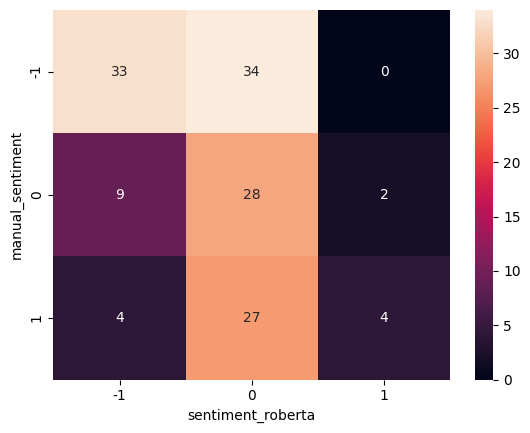

<Figure size 640x480 with 0 Axes>

In [67]:
plot_comp_CM(0,1)

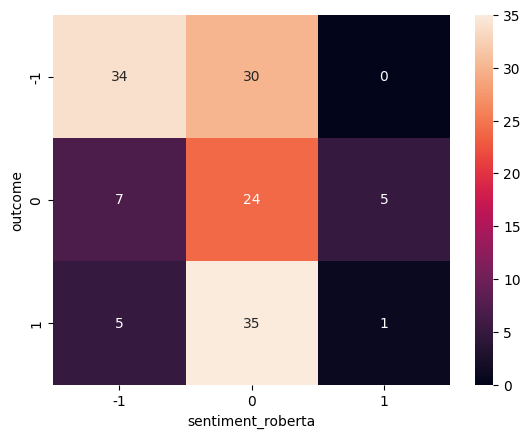

<Figure size 640x480 with 0 Axes>

In [68]:
plot_comp_CM(0,2)

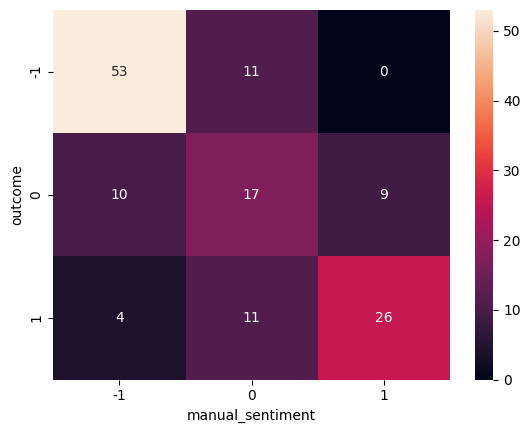

0.6808510638297872

<Figure size 640x480 with 0 Axes>

In [89]:
outcomeVsManualSentiment = plot_comp_CM(1,2).to_numpy()
outcomeVsManualSentiment.trace()/outcomeVsManualSentiment.sum()

In [81]:


def dist(c):
    return df_comp[comparable[c]].value_counts()/len(df_comp[comparable[c]])

df_agg = pd.DataFrame(data = {comparable[i]: dist(i) for i in range(3)})
print("Percent of scores for each value for each variable: ")
df_agg

Percent of scores for each value for each variable: 


,sentiment_roberta,manual_sentiment,outcome
-1,0.326241,0.475177,0.453901
0,0.631206,0.276596,0.255319
1,0.042553,0.248227,0.290780


# Correlation Matrix

In [91]:
df_comp.corr()

,sentiment_roberta,manual_sentiment,outcome
sentiment_roberta,1.000000,0.385472,0.365908
manual_sentiment,0.385472,1.000000,0.712487
outcome,0.365908,0.712487,1.000000
